<a href="https://colab.research.google.com/github/dtylor/WalkRNN/blob/master/GraphLM_walk_PROTEINS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/dtylor/WalkRNN.git
%cd WalkRNN
!ls

Cloning into 'WalkRNN'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 384 (delta 23), reused 0 (delta 0), pack-reused 326
Receiving objects: 100% (384/384), 1.95 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/WalkRNN
AIDS			      graphwave		     n2v
Cuneiform		      __init__.py	     OrgChart.ipynb
data			      LICENSE-3RD-PARTY.txt  PROTEINS
Demonstration.ipynb	      LICENSE.md	     README.md
GraphLM_walk_AIDS.ipynb       module.py		     test.py
GraphLM_walk_AIDS.py	      Motivation.ipynb	     TODO
GraphLM_walk_CUNEIFORM.ipynb  MUTAG.ipynb	     utilities.py


In [2]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    467      0 --:--:-- --:--:-- --:--:--   466
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
import fastai
import pandas as pd

In [4]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.1.0
nvidia driver : 418.67
torch cuda    : 10.0.130 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run t

In [5]:
str(fastai.__dict__['version'])
!more /usr/local/lib/python3.6/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.57'


In [6]:
!ls

AIDS			      graphwave		     n2v
Cuneiform		      __init__.py	     OrgChart.ipynb
data			      LICENSE-3RD-PARTY.txt  PROTEINS
Demonstration.ipynb	      LICENSE.md	     README.md
GraphLM_walk_AIDS.ipynb       module.py		     test.py
GraphLM_walk_AIDS.py	      Motivation.ipynb	     TODO
GraphLM_walk_CUNEIFORM.ipynb  MUTAG.ipynb	     utilities.py


In [0]:
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./PROTEINS")
y = load_graph_kernel_labels("./PROTEINS")


DONE


In [10]:
Gkern.nodes[12]

{'attr_0': 22.0, 'component': 1, 'label_0': 0}

In [12]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gkern, params={'num_kmeans_clusters': 5, "num_pca_components": 6, "num_batch":200, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [13]:
G.nodes[12]

{'attr_0': 13, 'component': 1, 'label_0': 0, 'structure': 3}

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=3)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

42


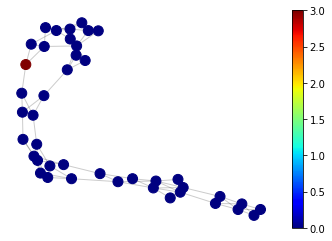

{1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 7, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3}


In [15]:

plotGW(G,1)

27


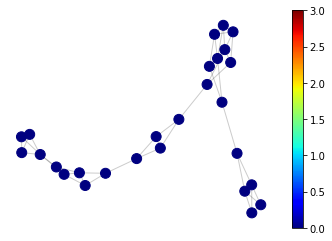

{43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3}


In [16]:
plotGW(G,2)

10


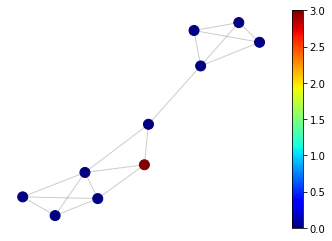

{70: 3, 71: 3, 72: 3, 73: 3, 74: 7, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3}


In [17]:
plotGW(G,3)

32


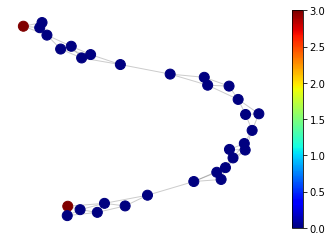

{14543: 7, 14544: 3, 14545: 3, 14546: 3, 14547: 3, 14548: 3, 14549: 3, 14550: 3, 14551: 3, 14552: 3, 14553: 3, 14554: 3, 14555: 3, 14556: 7, 14557: 3, 14558: 3, 14559: 3, 14560: 3, 14561: 3, 14562: 3, 14563: 3, 14564: 3, 14565: 3, 14566: 3, 14567: 3, 14568: 3, 14569: 3, 14570: 3, 14571: 3, 14572: 3, 14573: 3, 14574: 3}


In [18]:
plotGW(G,251)

20


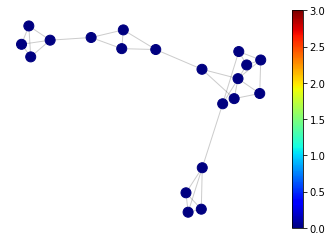

{743: 3, 744: 3, 745: 3, 746: 3, 747: 3, 748: 3, 749: 3, 750: 3, 751: 3, 752: 3, 753: 3, 754: 3, 755: 3, 756: 3, 757: 3, 758: 3, 759: 3, 760: 3, 761: 3, 762: 3}


In [19]:
plotGW(G,11)

28


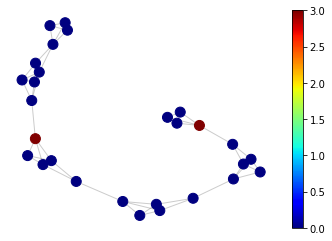

{14976: 3, 14977: 3, 14978: 3, 14979: 3, 14980: 3, 14953: 3, 14954: 3, 14955: 7, 14956: 3, 14957: 3, 14958: 3, 14959: 3, 14960: 3, 14961: 3, 14962: 3, 14963: 3, 14964: 7, 14965: 3, 14966: 3, 14967: 3, 14968: 3, 14969: 3, 14970: 3, 14971: 3, 14972: 3, 14973: 3, 14974: 3, 14975: 3}


In [20]:
plotGW(G,260)

285


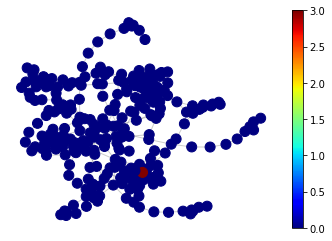

{1024: 3, 1025: 3, 1026: 3, 1027: 3, 1028: 3, 1029: 3, 1030: 3, 1031: 3, 1032: 3, 1033: 3, 1034: 3, 1035: 3, 1036: 3, 1037: 3, 1038: 3, 1039: 3, 1040: 3, 1041: 3, 1042: 3, 1043: 3, 1044: 3, 1045: 3, 1046: 3, 1047: 3, 1048: 3, 1049: 3, 1050: 3, 1051: 3, 1052: 3, 1053: 3, 1054: 3, 1055: 3, 1056: 3, 1057: 3, 1058: 3, 1059: 3, 1060: 3, 1061: 3, 1062: 3, 1063: 3, 1064: 3, 1065: 3, 1066: 3, 1067: 3, 1068: 3, 1069: 3, 1070: 3, 1071: 3, 1072: 3, 1073: 3, 1074: 3, 1075: 3, 1076: 3, 1077: 3, 1078: 3, 1079: 3, 1080: 3, 1081: 3, 1082: 3, 1083: 3, 1084: 3, 1085: 3, 1086: 3, 1087: 3, 1088: 3, 1089: 3, 1090: 3, 1091: 3, 1092: 3, 1093: 3, 1094: 3, 1095: 3, 1096: 3, 1097: 3, 1098: 3, 1099: 3, 1100: 3, 1101: 3, 1102: 3, 1103: 3, 1104: 3, 1105: 3, 1106: 3, 1107: 3, 1108: 3, 1109: 3, 1110: 3, 1111: 3, 1112: 3, 1113: 3, 1114: 3, 1115: 3, 1116: 3, 1117: 3, 1118: 3, 1119: 3, 1120: 3, 1121: 3, 1122: 3, 1123: 3, 1124: 3, 1125: 3, 1126: 3, 1127: 3, 1128: 3, 1129: 3, 1130: 3, 1131: 3, 1132: 3, 1133: 3, 1134: 3, 

In [21]:
plotGW(G,18)

122


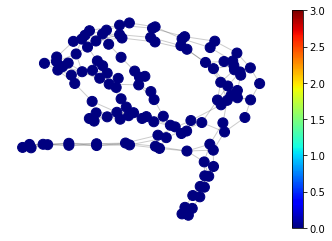

{7714: 3, 7715: 3, 7716: 3, 7717: 3, 7718: 3, 7719: 3, 7720: 3, 7721: 3, 7722: 3, 7723: 3, 7724: 3, 7725: 3, 7726: 3, 7727: 3, 7728: 3, 7729: 3, 7730: 3, 7731: 3, 7732: 3, 7733: 3, 7734: 3, 7735: 3, 7736: 3, 7737: 3, 7738: 3, 7739: 3, 7740: 3, 7741: 3, 7742: 3, 7743: 3, 7744: 3, 7745: 3, 7746: 3, 7747: 3, 7748: 3, 7749: 3, 7750: 3, 7751: 3, 7752: 3, 7753: 3, 7754: 3, 7755: 3, 7756: 3, 7757: 3, 7758: 3, 7759: 3, 7760: 3, 7761: 3, 7762: 3, 7763: 3, 7764: 3, 7765: 3, 7766: 3, 7767: 3, 7768: 3, 7769: 3, 7770: 3, 7771: 3, 7772: 3, 7773: 3, 7774: 3, 7775: 3, 7776: 3, 7777: 3, 7778: 3, 7779: 3, 7780: 3, 7781: 3, 7782: 3, 7783: 3, 7784: 3, 7785: 3, 7786: 3, 7787: 3, 7788: 3, 7789: 3, 7790: 3, 7791: 3, 7792: 3, 7793: 3, 7794: 3, 7795: 3, 7796: 3, 7797: 3, 7798: 3, 7799: 3, 7800: 3, 7801: 3, 7802: 3, 7803: 3, 7804: 3, 7805: 3, 7806: 3, 7807: 3, 7808: 3, 7809: 3, 7810: 3, 7811: 3, 7812: 3, 7813: 3, 7814: 3, 7815: 3, 7816: 3, 7817: 3, 7818: 3, 7819: 3, 7820: 3, 7821: 3, 7822: 3, 7823: 3, 7824: 3, 

In [22]:
plotGW(G,140)

In [0]:
from module import walk_as_string

In [24]:
walks = walk_as_string(G, componentLabels = y)

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/content/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[ 1 33 31 23 41 33 12 23 12 33  1 23  1 33  1 12  1 12 33 12 33 41 33 31 32 13 32 42 24 32]
[ 1 23 31 32 24 25  3 30  4  5 39  4 30  3 25 34 13 34 35 24 32 13 32  2 42 34 35  3 25 24]
[ 1 33 41 33  1 23 41 23 31 32 34 32 24 32 31 23 31 32 34 13 34 32  2 32 24  2 24 42 24 32]


In [0]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy

In [26]:
walks.head()

,walk,label,start_node,component
0,0 3 13 1 3 8 1 3 8 1 3 8 1 3 8 1 3 8 0 3...,1,1,1
1,0 3 13 1 3 8 1 3 8 1 3 8 1 3 15 1 3 15 0...,1,1,1
2,0 3 13 1 3 8 1 3 8 1 3 8 0 3 13 1 3 8 1 ...,1,1,1
3,0 3 13 1 3 8 1 3 8 1 3 8 0 3 15 1 3 8 1 ...,1,1,1
4,0 3 13 1 3 8 0 3 13 0 3 13 0 3 13 1 3 8 ...,1,1,1


In [27]:
walks.shape

(869320, 4)

In [0]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [29]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(605040, 4)

In [30]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(97280, 4)

In [31]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(167000, 4)

In [0]:
!mkdir result
mypath = './result'

In [0]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [0]:
data_lm.save('data_lm.pkl')

In [35]:
!ls -l ./result

total 738208
-rw-r--r-- 1 root root 755919468 Sep 28 17:25 data_lm.pkl


In [0]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm.pkl', bs=bs)


In [37]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,1 3 8 1 3 8 0 3 15 1 3 8 1 3 8 1 3 15 1 3 8 xxbos 0 3 13 1 3 8 1 3 8 1 3 8 1 3 15 1 3 15 0 3 13 1 3 8 0 3 15 0 3 10 1 3 8 0 3 15 1 3 8 0 3 13 1 3 15 1 3 15
1,13 1 3 15 0 3 13 1 3 15 0 3 13 0 3 8 0 3 13 0 3 8 1 3 8 0 3 8 0 3 10 0 3 8 0 3 10 1 3 8 0 3 10 1 3 8 0 3 13 0 3 8 0 3 15 1 3 8 0 3 15 1 3 8 0 3 15 xxbos 1 3
2,0 3 10 1 3 8 0 3 15 1 3 8 0 3 10 0 3 15 1 3 8 xxbos 0 3 10 1 3 8 0 3 10 0 3 10 1 3 8 0 3 10 1 3 8 1 3 8 1 3 8 1 3 8 0 3 10 0 3 10 1 3 8 0 3 15 1 3 8 0 3 10
3,8 1 3 8 1 3 8 1 3 8 0 3 10 0 3 8 0 3 15 0 3 10 1 3 8 1 3 15 1 3 8 1 3 15 1 3 8 1 3 15 1 3 8 1 3 8 0 3 10 1 3 8 1 3 15 1 3 8 1 3 8 1 3 15 1 3 8 xxbos 1 3
4,0 3 15 0 3 10 0 3 15 0 3 8 0 3 15 0 3 10 0 3 8 xxbos 0 3 8 0 3 8 0 3 15 1 3 15 1 3 15 1 3 8 1 3 15 0 3 8 0 3 10 0 3 15 0 3 10 0 3 8 0 3 15 0 3 8 0 3 10 0 3 8


In [0]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.577068,0.565149,0.745403,14:04


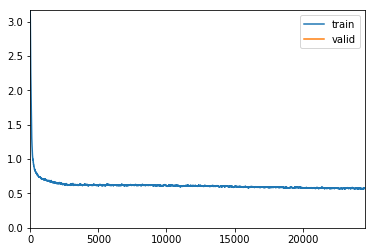

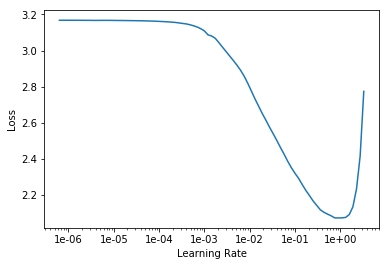

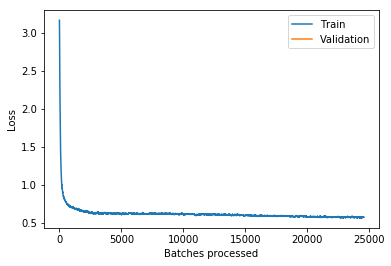

In [39]:

learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


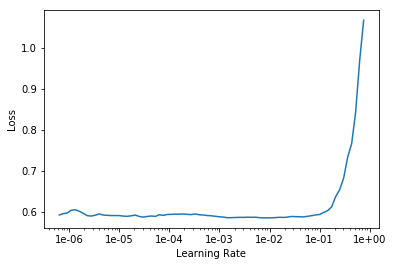

In [40]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.598247,0.588843,0.740132,13:57
1,0.566814,0.561350,0.751233,14:21


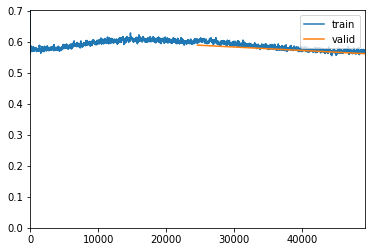

In [41]:
learn.fit_one_cycle(2, .01, moms=(0.8,0.7))

In [0]:
learn.save('fit-head')

In [0]:
learn.save_encoder('fine_tuned_enc3')

In [44]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN
127,0 3 15 0 7 15 0 3 15 0 7 15 1 3 15 1 3 15...,1,8,1,127,1.0
1401,0 3 15 0 3 15 0 3 8 0 3 15 1 3 15 0 3 15 ...,1,20,1,1401,2.0
2228,0 3 10 0 3 13 1 3 8 0 3 10 1 3 8 0 3 15 ...,1,16,1,2228,3.0
4442,1 3 15 1 3 15 1 3 15 1 3 15 0 3 13 1 3 8 ...,1,34,1,4442,4.0
10282,0 3 10 0 3 15 1 3 8 0 3 15 1 3 8 1 3 15 ...,1,5,1,10282,5.0


Choose a path per node and concatenate for entire component

In [45]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
1,1,0 3 15 0 7 15 0 3 15 0 7 15 1 3 15 1 3 15...
2,1,0 3 10 0 3 15 1 3 8 0 3 10 1 3 8 0 3 13 ...
3,1,0 3 15 0 3 10 0 3 15 0 3 10 0 3 15 0 3 10...
4,1,1 3 8 0 3 8 0 3 15 0 3 15 0 3 15 0 3 15 ...
5,1,1 3 8 1 3 8 1 3 8 1 3 8 1 3 15 1 3 15 1 ...


In [46]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
1,1,0 3 15 0 7 15 0 3 15 0 7 15 1 3 15 1 3 15...,1
2,1,0 3 10 0 3 15 1 3 8 0 3 10 1 3 8 0 3 13 ...,2
3,1,0 3 15 0 3 10 0 3 15 0 3 10 0 3 15 0 3 10...,3
4,1,1 3 8 0 3 8 0 3 15 0 3 15 0 3 15 0 3 15 ...,4
5,1,1 3 8 1 3 8 1 3 8 1 3 8 1 3 15 1 3 15 1 ...,5


In [47]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((800, 3), (201, 3), (112, 3), 0.7187780772686433)

In [0]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [0]:
data_clas.save('tmp_clas')

In [0]:
data_clas = load_data(mypath, 'tmp_clas', bs=bs)


In [51]:
data_clas.show_batch()

text,target
xxbos 1 4 15 0 4 15 0 4 8 0 4 15 0 4 8 1 4 15 0 6 15 1 4 15 0 6 15 1 4 15 0 4 8 1 4 15 0 4 8 1 4 15 0 6 15 1 4 15 0 4 8 1 4 15 0 6 15 1 4 15 0 4 8 0 4 15 1 4 15,2
xxbos 0 7 10 0 7 10 0 7 10 0 7 10 0 7 8 0 7 8 0 7 10 0 7 10 0 7 10 0 7 10 0 7 10 0 7 10 0 7 10 0 7 10 0 7 10 0 5 15 0 7 10 0 7 10 0 5 15 0 7 10 0 5 15 0 7 10 0 7 8,2
xxbos 0 3 13 0 3 8 0 3 15 0 3 8 0 3 15 0 3 8 0 3 15 0 3 8 0 3 13 0 3 10 0 3 10 0 3 10 0 3 13 0 3 8 0 3 15 0 3 8 0 3 15 0 3 8 0 3 13 0 3 10 0 3 13 0 3 8 0 3 15,1
xxbos 0 7 10 0 7 8 0 7 10 0 7 10 0 7 15 0 7 10 0 7 15 0 7 10 0 5 15 0 7 10 0 7 15 0 7 10 0 7 15 0 7 10 0 5 15 0 7 10 0 7 15 0 7 10 0 7 15 0 7 10 0 7 15 0 7 10 0 7 15,2
xxbos 0 7 8 1 7 15 1 7 8 0 3 8 1 7 8 0 3 8 1 7 15 0 7 8 1 7 8 0 7 10 1 7 8 0 3 8 1 7 8 1 7 15 1 7 8 0 3 8 0 7 8 0 3 8 1 7 8 0 7 8 0 3 8 0 7 8 1 7 15,1


In [0]:
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [0]:
gc.collect();

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


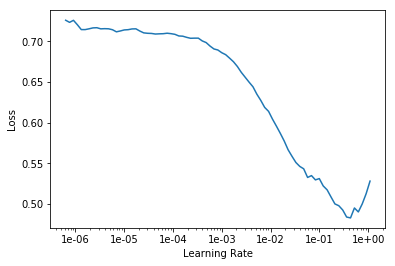

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.369302,0.416267,0.885572,00:06


In [0]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [58]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.297173,0.260659,0.890547,00:06


In [59]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))



epoch,train_loss,valid_loss,accuracy,time
0,0.271197,0.249593,0.925373,00:11
1,0.258542,0.341636,0.895522,00:11
2,0.251380,0.343929,0.895522,00:11
3,0.242914,0.329158,0.905473,00:11
4,0.246073,0.329996,0.910448,00:11
5,0.242546,0.356815,0.895522,00:11
6,0.240634,0.375751,0.890547,00:11
7,0.239430,0.331252,0.905473,00:11


In [60]:
predict(test,learn)

(112, 101, 0.9017857142857143)


In [61]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.238598,0.303267,0.915423,00:11
1,0.236217,0.342200,0.900497,00:11
2,0.232127,0.328764,0.900497,00:11
3,0.226034,0.335973,0.900497,00:11
4,0.222614,0.301789,0.915423,00:11
5,0.221880,0.331263,0.910448,00:11
6,0.220842,0.394155,0.865672,00:11
7,0.220152,0.369425,0.890547,00:11
8,0.219989,0.447084,0.835821,00:11
9,0.207958,0.364906,0.905473,00:11


In [62]:
predict(test,learn)

(112, 100, 0.8928571428571429)


In [63]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.208848,0.336032,0.905473,00:11
1,0.205082,0.307251,0.915423,00:11
2,0.206916,0.367502,0.895522,00:11
3,0.202729,0.316596,0.915423,00:11
4,0.209244,0.318413,0.905473,00:11
5,0.215616,0.259241,0.925373,00:11
6,0.207063,0.238288,0.925373,00:11
7,0.209568,0.243497,0.930348,00:11
8,0.204034,0.246448,0.925373,00:11
9,0.207923,0.245723,0.925373,00:11


In [64]:
predict(test,learn)

(112, 101, 0.9017857142857143)


In [65]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.204667,0.273319,0.915423,00:11
1,0.198852,0.262638,0.915423,00:11
2,0.199471,0.288559,0.910448,00:11
3,0.196509,0.261464,0.915423,00:11
4,0.208976,0.263876,0.915423,00:11
5,0.215368,0.281542,0.910448,00:11
6,0.206000,0.271536,0.910448,00:11
7,0.208904,0.293684,0.900497,00:11
8,0.207563,0.339033,0.895522,00:11
9,0.203324,0.286215,0.905473,00:11


In [66]:
predict(test,learn)

(112, 100, 0.8928571428571429)


In [67]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.188244,0.288909,0.905473,00:11
1,0.186882,0.285771,0.905473,00:11
2,0.191809,0.255977,0.910448,00:11
3,0.197107,0.263340,0.910448,00:11
4,0.200306,0.300077,0.895522,00:11
5,0.198156,0.257568,0.910448,00:11
6,0.202342,0.274950,0.910448,00:11
7,0.194830,0.263566,0.910448,00:11
8,0.191289,0.298589,0.905473,00:11
9,0.191317,0.277356,0.905473,00:11


In [68]:
predict(test,learn)

(112, 99, 0.8839285714285714)


In [69]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.184428,0.302522,0.905473,00:11
1,0.187037,0.329408,0.890547,00:11
2,0.183195,0.313298,0.895522,00:11
3,0.185549,0.256149,0.910448,00:11
4,0.182905,0.362310,0.865672,00:11
5,0.191676,0.393261,0.835821,00:11
6,0.199907,0.387925,0.850746,00:11
7,0.196631,0.458548,0.825871,00:11
8,0.197767,0.359950,0.875622,00:11
9,0.192819,0.315386,0.900497,00:11


In [70]:
predict(test,learn)

(112, 99, 0.8839285714285714)


In [71]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.186871,0.286004,0.910448,00:11
1,0.198662,0.301238,0.905473,00:11
2,0.190658,0.314843,0.900497,00:11
3,0.195153,0.307379,0.900497,00:11
4,0.196488,0.277240,0.915423,00:11
5,0.193079,0.295689,0.900497,00:11
6,0.190721,0.260242,0.920398,00:11
7,0.190329,0.271653,0.925373,00:11
8,0.185563,0.278618,0.920398,00:11
9,0.183448,0.243987,0.920398,00:11


In [72]:
predict(test,learn)

(112, 108, 0.9642857142857143)


In [79]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(24, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(24, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)